<a href="https://colab.research.google.com/github/jaimeload/APHW/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Домашнее задание 1
###1.1. Скачать данные по ссылке
https://drive.google.com/file/d/1Ep9ncT58xJ059I3hDeX2YuJTq4advJTT/view?usp=share_link

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.parsers.readers import read_csv
df = read_csv('./kc-house-data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


###1.2 Изучите стоимости недвижимости

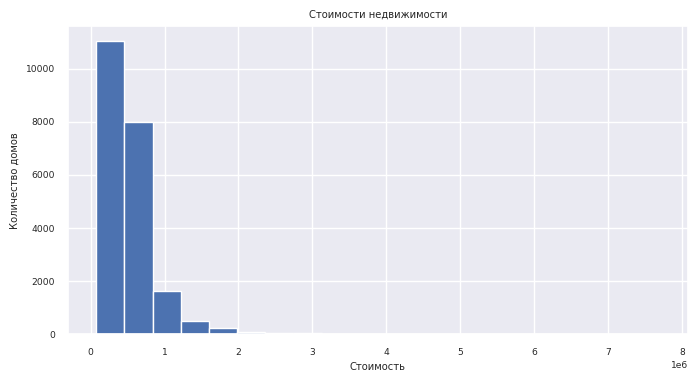

In [42]:
plt.figure(figsize = (8, 4))
plt.hist(df['price'], bins = 20)
plt.title('Стоимости недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество домов');

Стоимость большинства домов находится в пределе от 200 до 700 тысяч.

###1.3 Изучите распределение квадратуры жилой площади

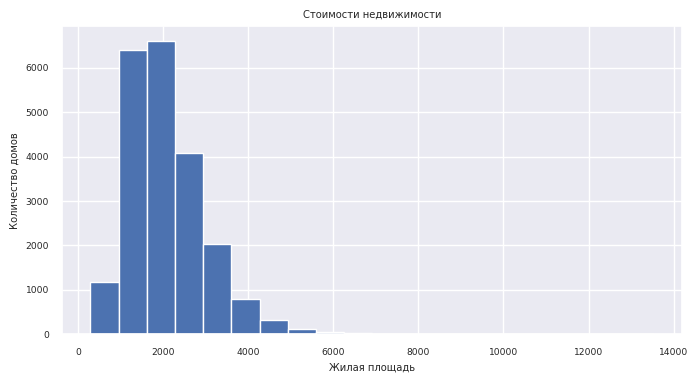

In [44]:
plt.figure(figsize = (8, 4))
plt.hist(df['sqft_living'], bins = 20)
plt.title('Стоимости недвижимости')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество домов');

Большинство домов имеют площадь от 1000 до 3000 кв. футов

###1.4 Изучите распределение года постройки

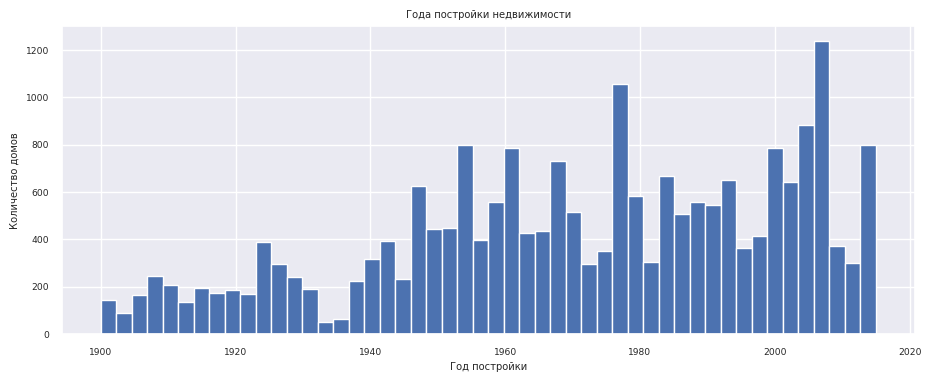

In [45]:
plt.figure(figsize = (11, 4))
plt.hist(df['yr_built'], bins = 50)
plt.title('Года постройки недвижимости')
plt.xlabel('Год постройки')
plt.ylabel('Количество домов');

Основное количество домов построено в период с 50-х по 2015 г. В некоторые года наблюдается большой всплеск строительства. До 50-х домов строилось меньше, особенно в 30-е.

##Домашнее задание 2
###2.1 Изучите распределение домов от наличия вида на набережную

In [46]:
data21 = df['waterfront'].value_counts().reset_index()
data21.replace({0: 'Нет', 1: 'Да'}, inplace=True)
data21

,index,waterfront
0,Нет,21450
1,Да,163


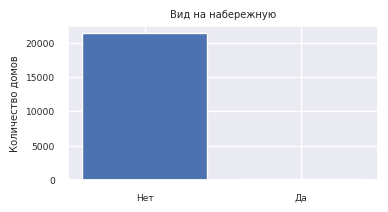

In [47]:
plt.figure(figsize = (4, 2))
plt.bar(data21['index'], data21['waterfront'])
plt.title('Вид на набережную')
plt.ylabel('Количество домов');

Домов с видом на набережную очень мало

###2.2 Изучите распределение этажей домов

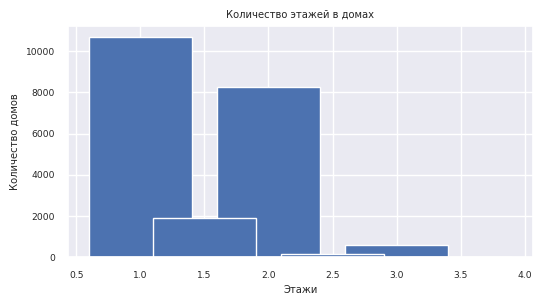

In [48]:
data22 = df['floors'].value_counts().reset_index()
plt.figure(figsize = (6, 3))
plt.bar(data22['index'], data22['floors'])
plt.title('Количество этажей в домах')
plt.xlabel('Этажи')
plt.ylabel('Количество домов');

Преобладают одно- и двухэтажные дома

###2.3 Изучите распределение состояния домов

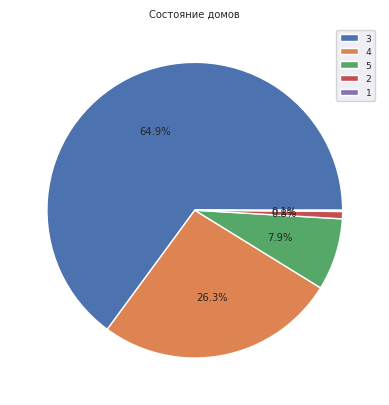

In [49]:
data23 = df['condition'].value_counts()
plt.pie(data23, autopct='%1.1f%%')
plt.title('Состояние домов')
plt.legend(data23.index);

Большинство домов находится в среднем состоянии, довольно много - в хорошем и отличном. Домов в низком состоянии крайне мало.

##Домашнее задание 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.


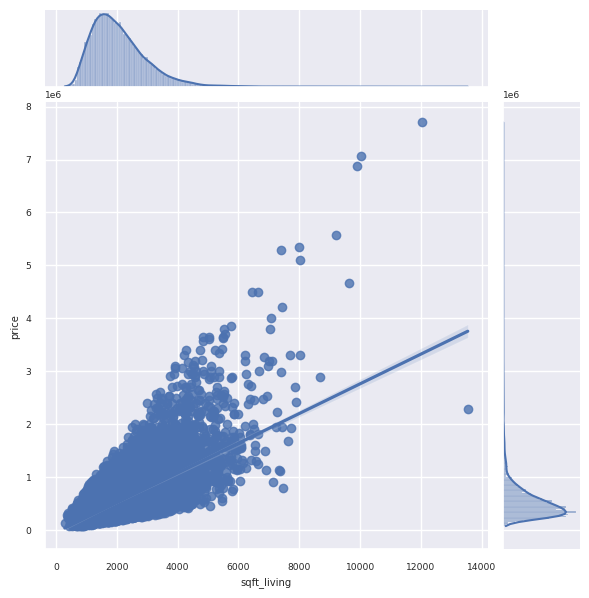

In [50]:
sns.jointplot(x = df['sqft_living'], y = df['price'], kind='reg');

Наблюдается прямая зависимость между жилой площадью и стоимостью домов

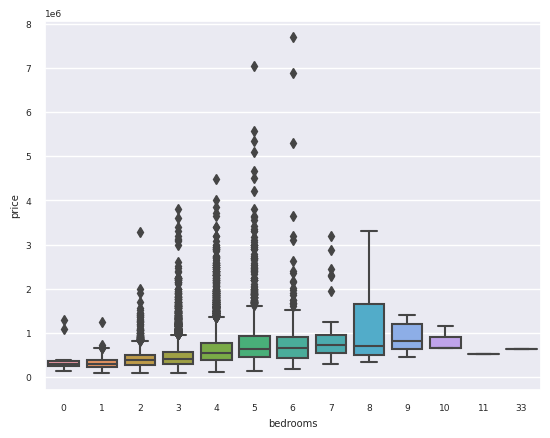

In [51]:
sns.boxplot(x = df['bedrooms'], y = df['price'].sort_values());

По мере роста количества спален до 8 растёт стоимость домов, а вот уже после - нет

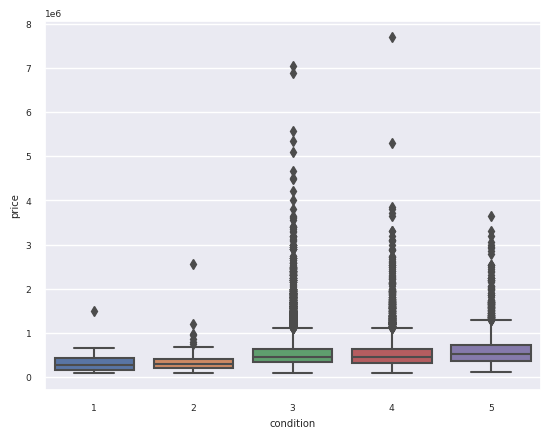

In [52]:
sns.boxplot(x = df['condition'], y = df['price'].sort_values());

Cостояния домов не сильно влияет на их стоимость в среднем, но наблюдаются заметные выбросы

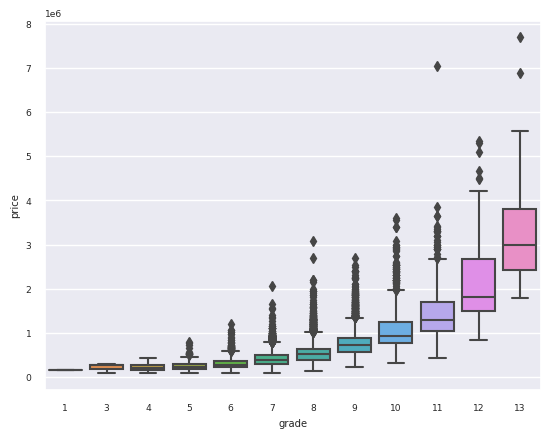

In [53]:
sns.boxplot(x = df['grade'], y = df['price'].sort_values());

А вот уже оценка домов напрямую влияет на стоимость

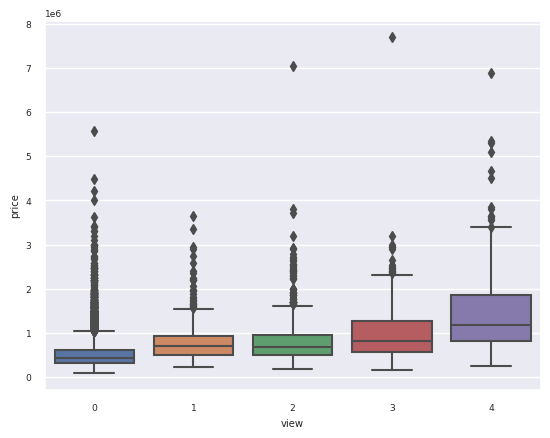

In [54]:
sns.boxplot(x = df['view'], y = df['price'].sort_values());

Как и наличие красивого вида

###Корреляционная матрица

In [35]:
dfcorr = df.drop(columns=['id', 'date', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], inplace=True)

In [36]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix;

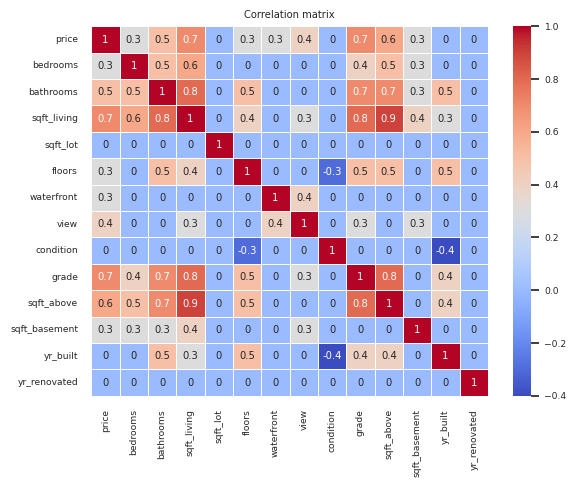

In [37]:
sns.set(font_scale=0.6)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Correlation matrix');